**log-001 Notebook for a learning-from-time-series situation**
**(the 2020 COVID-19 case)** 

Contents in an ordering of cells:

0. Importing general packages
1. Read raw dataframe from internet and store it locally (pickle)
2. Read pickled dataframe
3. Select the countries in the list, do per country\
    3.1. Prepare  the sequences\
    3.2. Plot the sequences  

In [1]:
# 0. Importing general packages 
import sys                                         # Python ≥3.5 is required
assert sys.version_info >= (3, 5)
import sklearn                              # Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"
                                                            # Common imports
import pandas as pd                                #Pandas (data management)
import numpy as np                                 #Numpy (math operatiomns)
import os                                    #OS for operating system access
                                                    # To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator) 
                             # Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

1. Read raw dataframe from internet and store it locally (pickle)

In [2]:
import io
import requests
        # For the EU: 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
        #read the DataFrame from URL? 
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
txt = "\n ... MAY TAKE SOME CONSIDERABLE TIME ...  \n yes/no: "
question = "Read from " + url + txt 
if input(question) == "yes":
    print("... reading from " + url + " ...")   
    s = requests.get(url).content               #Prepare reading from URL
    source = io.StringIO(s.decode('utf-8'))     #
    df = pd.read_csv(source,                    #Read from URL into Pandas DataFrame
        header = 0,                             #Read from URL
        index_col = "dateRep",                  #Read from URL
        squeeze = False,                        #Read from URL
        usecols = ["dateRep",                   #Read from URL
                   "countryterritoryCode",      #Read from URL
                   "cases_weekly",              #Read from URL
                   "deaths_weekly",             #Read from URL
                   "popData2019"])              #Read from URL
    df.fillna(0)  
    df.info()
    df.to_pickle("df.pkl")                      #Write to pickled file
else:
    df = pd.read_pickle("df.pkl")
    df.info()


Read from https://opendata.ecdc.europa.eu/covid19/casedistribution/csv
 ... MAY TAKE SOME CONSIDERABLE TIME ...  
 yes/no: yes
... reading from https://opendata.ecdc.europa.eu/covid19/casedistribution/csv ...
<class 'pandas.core.frame.DataFrame'>
Index: 8938 entries, 14/12/2020 to 23/03/2020
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cases_weekly          8938 non-null   int64  
 1   deaths_weekly         8938 non-null   int64  
 2   countryterritoryCode  8920 non-null   object 
 3   popData2019           8920 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 349.1+ KB


**Select countries & do per country: 
                        prepare & plot**

Save figures in .svg files? yes/no yes

The figure for USA saved in .svg file ...

The figure for CAN saved in .svg file ...

The figure for MEX saved in .svg file ...

The figure for BRA saved in .svg file ...

The figure for IDN saved in .svg file ...

The figure for IND saved in .svg file ...

The figure for ARE saved in .svg file ...

GOODBYE!



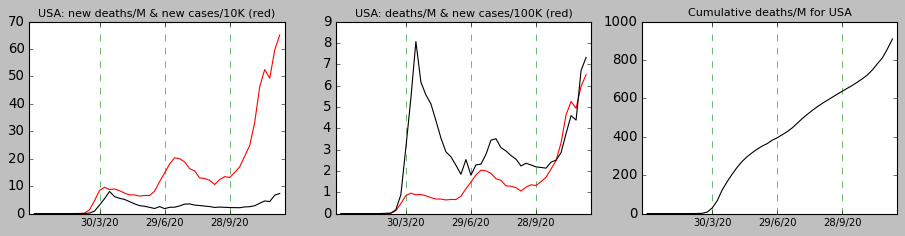

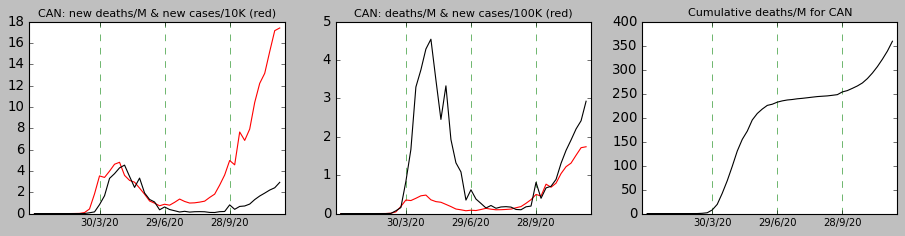

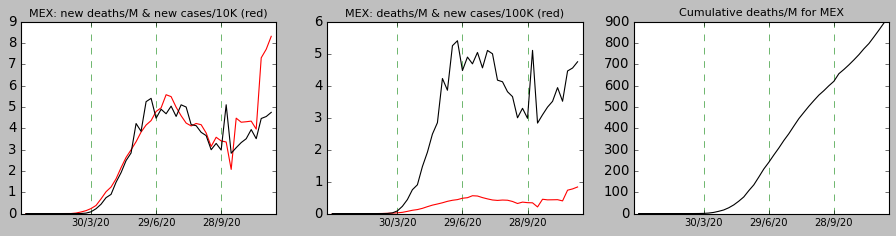

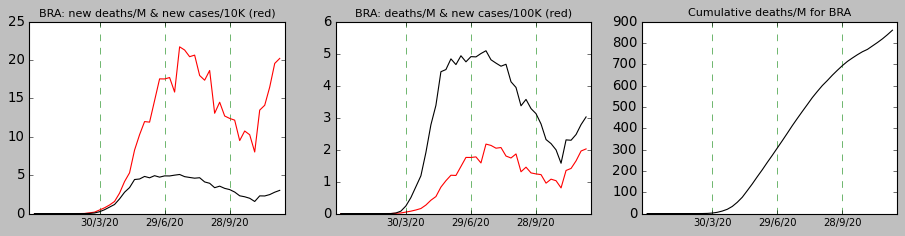

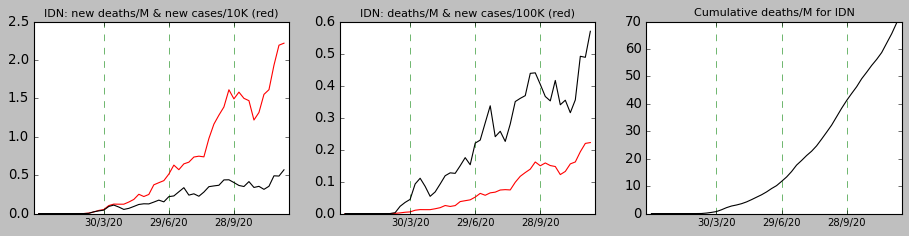

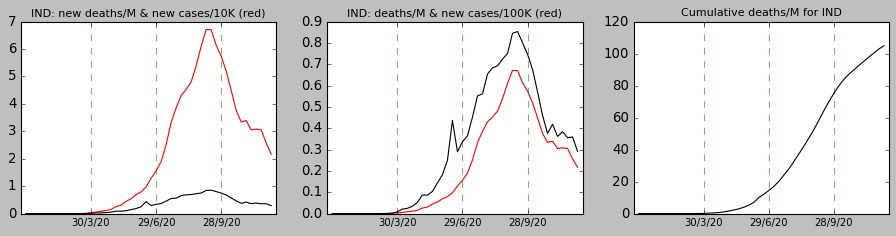

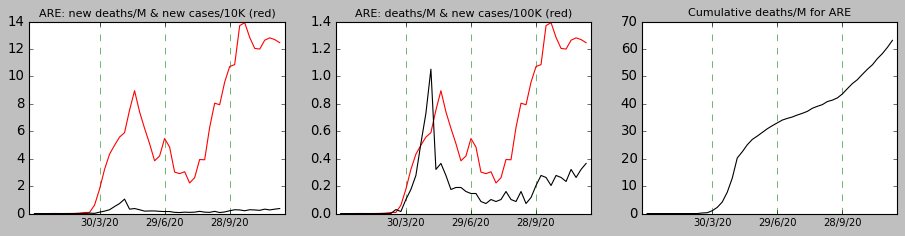

In [7]:
#set the collection of countries you wish to analyze
#ANTI-CYCLIC
#countries = ['NLD','BEL','AUT', 'DEU', 'SWE','GBR','FRA','ITA','ESP','GRC']
#FRAGMENTED
#countries = ['USA','BRA','ZAF']
#CONTROL-ORIENTED
#countries = ['NZL','KOR', 'CHN' ]
#SANDBOX
countries = ['NLD','GBR','DEU','BEL','FRA','ESP','ITA'] #,'GRC','TUR','POL','BLR','UKR','ROU']
countries = ['NZL','AUS','KOR','JPN','SGP','THA','PHL'] 
countries = ['USA','CAN','MEX','BRA']    #'VEN',,'ARG'
countries = ['CHN','KOR','JPN','SGP','NZL','AUS','THA','VNM','KHM','PHL','IDN','IND']
countries = ['PAK','AFG','IRN','IRQ','SYR','ARE','YEM','OMN','MAR','DZA','TUN','EGY','ISR']
countries = ['SOM','ERI','ETH','SDN','NER','NGA','UGA','KEN','SEN','MLI','TZA']
countries = ['COG','GAB','AGO','ZMB','MDG','MOZ','ZWE','BWA','NAM','ZAF']
############   INSERT THE ONE TO BE PLAYED:  

countries = ['USA','CAN','MEX','BRA','IDN','IND','ARE']   

question = "Save figures in .svg files? yes/no " 
if input(question) == "yes":
    saveplot = True
else:
    saveplot = False

                            #xmax determined by length CHN's data sequence 
xmax = len(df[df['countryterritoryCode'] == 'CHN'])

INTERMEDIATERESULTS = []
for countryname in countries:                # [::-1] invert sequence
    country = df[df['countryterritoryCode'] == countryname][::-1].copy()
    country.index.sort_values(ascending=False)
    
    pop = country['popData2019'].copy()[-1]  # get the population size
    
    x0 = country.index                       # x-axes  

    y0 = country['cases_weekly'].copy()      #
    y1 = country['deaths_weekly'].copy()     # copy DataFrame section
    
    y0.fillna(0)
    y1.fillna(0) 
    
          #now recompute the vectors to plot
    factor0 = 10                                     #=================================
    factor0a = 100                                   #=================================
    factor1 = 1                                      #now recompute the vectors to plot
    factor2 = 1                                      #now recompute the vectors to plot
    cumulativedeaths = 0                             #now recompute the vectors to plot
    
    y0a,y0b = [],[]                            #CASES per DAY per MILLION
    for i in y0:                                     
        cpdip = i / 7                                #cases per day in population
        cpdpm = (cpdip / pop) * 1000_000             #cases per day per million
        cdpmproc = cpdpm / factor0             #cases per day per million
        cdpmprocb = cpdpm / factor0a 
        y0a.append(cdpmproc)          
        y0b.append(cdpmprocb)                        #now recompute the vectors to plot
  
    
    y1a = []                            #DEATHS per DAY per MILLION
    for i in y1:                                     
        dpdip = i / 7                                #deaths per day in population
        dpdpm = (dpdip / pop) * 1000_000             #deaths per day per million
        dpdmproc = dpdpm / factor1 
        y1a.append(dpdmproc)         #now recompute the vectors to plot
        
    y2a = []                            #CUMULATIVE DEATHS per MILLION
    for i in y1:                                     
        dtwip = i                                    #deaths this week in population  
        dtwpm = (dtwip / pop) * 1000_000             #now recompute the vectors to plot
        cumulativedeaths = cumulativedeaths + dtwpm  #now recompute the vectors to plot  
        y2a.append(cumulativedeaths)                 #now recompute the vectors to plot
        
    shftl = xmax - len(y0a)
    
    if shftl > 0 :
        for x in range(0,(shftl - 1)):
            y0a = [0.0].append(y0a)
            y1a = [0.0].append(y1a)
            y2a = [0.0].append(y2a)
        print("@@@@@@ shftl ", shftl, " y0a ", y0a)  
    #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot 
    
    #from matplotlib.ticker import FuncFormatter
    txt0 = ": new deaths/M & new cases/10K (red)"             #=============================
    txt0a = ": deaths/M & new cases/100K (red)"               #=============================
    xmin = -1
    #xmax = 20                 #xmax determined by user [(un)comment]
    #xmax = len(y1) + 1        #xmax determined by length data sequence [(un)comment]
  
    plt.style.use('classic')   
    #plt.style.use('bmh')   
    #plt.style.use('fivethirtyeight')   
    #plt.style.use('grayscale')
    fig = plt.figure(figsize=(14, 3))
    
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3) 

    #fig.autofmt_xdate()
    #fig.subplots_adjust() 
   
    ax1.set_title(countryname + txt0 , fontsize = 10)
    ax1.set_xlim([xmin,xmax])
    ax1.axvline(x = 13, color = 'g', linestyle = '--', linewidth = 0.5 )
    ax1.axvline(x = 26, color = 'g', linestyle = '--', linewidth = 0.5 )
    ax1.axvline(x = 39, color = 'g', linestyle = '--', linewidth = 0.5 )
    ax1.set_xticks((13, 26, 39)) 
    ax1.set_xticklabels(('30/3/20', '29/6/20', '28/9/20'), fontsize = 9)
    ax1.plot(x0,y0a, color='red')
    ax1.plot(x0,y1a, color='black')
    
    ax2.set_title(countryname + txt0a , fontsize = 10)
    ax2.set_xlim([xmin,xmax])
    ax2.axvline(x = 13, color = 'g', linestyle = '--', linewidth = 0.5 )
    ax2.axvline(x = 26, color = 'g', linestyle = '--', linewidth = 0.5 )
    ax2.axvline(x = 39, color = 'g', linestyle = '--', linewidth = 0.5 )
    ax2.set_xticks((13, 26, 39)) 
    ax2.set_xticklabels(('30/3/20', '29/6/20', '28/9/20'), fontsize = 9)
    ax2.plot(x0,y0b, color='red')
    ax2.plot(x0,y1a, color='black')
    
    ax3.set_title("Cumulative deaths/M for " + countryname , fontsize = 10)
    ax3.set_xlim([xmin,xmax])
    ax3.axvline(x = 13, color = 'g', linestyle = '--', linewidth = 0.5 )
    ax3.axvline(x = 26, color = 'g', linestyle = '--', linewidth = 0.5 )
    ax3.axvline(x = 39, color = 'g', linestyle = '--', linewidth = 0.5 )
    ax3.set_xticks((13, 26, 39)) 
    ax3.set_xticklabels(('30/3/20', '29/6/20', '28/9/20'), fontsize = 9)
    ax3.plot(x0,y2a, color='black')
    
    INTERMEDIATERESULTS.append([countryname,y2a])

    question = "Save figures in .svg files? yes/no " 
    if saveplot == True:
        plotfilename = countryname + ".svg"  
        fig.savefig(plotfilename)
        print("\nThe figure for " + countryname + " saved in .svg file ...") 
    else:
        print("\nThe figure for " + countryname + " not saved in a file ...") 


print("\nGOODBYE!\n")
    



The figure for ['USA', 'CAN', 'MEX', 'BRA', 'IDN', 'IND', 'ARE'] saved in .svg file ...


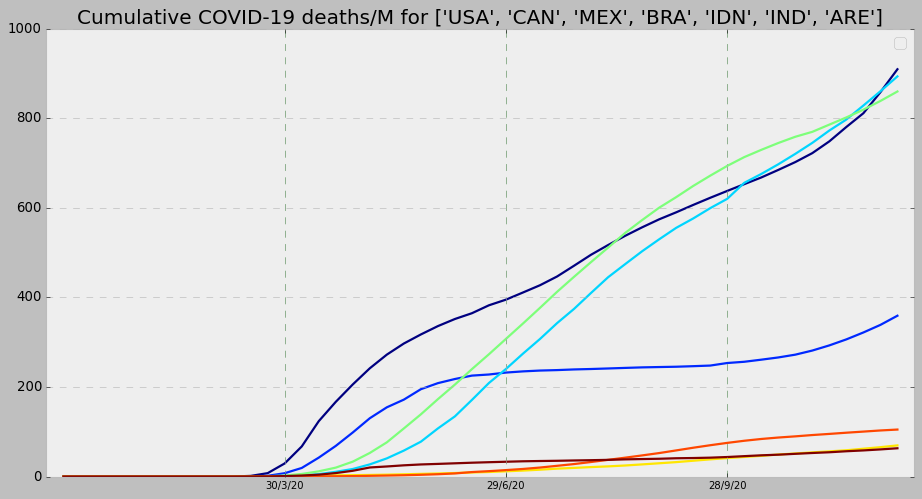

In [8]:
#INTERMEDIATERESULTS.append([countryname,y2a])

#plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot 
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(INTERMEDIATERESULTS))))
    
#from matplotlib.ticker import FuncFormatter
txt3 = " Cumulative deaths/M per country" 
    
plt.style.use('bmh')
fig1 = plt.figure(figsize=(14, 7))
    
#plt.style.use('fivethirtyeight')
axe = fig1.add_subplot(1,1,1)
#plt.style.use('grayscale')
    
#fig.autofmt_xdate()
#fig.subplots_adjust()

name, color = axe.get_legend_handles_labels()
axe.legend(name, color)
xxx = str(countries)
axe.set_title("Cumulative COVID-19 deaths/M for " + xxx , fontsize = 18)
axe.set_xlim([xmin,xmax])
axe.axvline(x = 13, color = 'g', linestyle = '--', linewidth = 0.5 )
axe.axvline(x = 26, color = 'g', linestyle = '--', linewidth = 0.5 )
axe.axvline(x = 39, color = 'g', linestyle = '--', linewidth = 0.5 )
axe.set_xticks((13, 26, 39)) 
axe.set_xticklabels(('30/3/20', '29/6/20', '28/9/20'), fontsize = 9)
name, color = axe.get_legend_handles_labels()
for i in INTERMEDIATERESULTS:
    name = i[0]
    y3 = i[1]
    axe.legend(name,color)
    axe.plot(x0,y3, color=next(colors))
    axe.legend(name,color)

plotfilename = xxx + ".svg"  
fig1.savefig(plotfilename)
print("\nThe figure for " + xxx + " saved in .svg file ...") 


**Specify (list with country codes of countries to investigate**
(adapt this for different runs)
(an .svg file named by countrycode will be stored for each run)

Here is a list of countrycodes:

L0  = ['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI'] \
L1  = ['BEL', 'BEN', 'BES', 'BGD', 'BGR', 'BHS', 'BIH', 'BLR', 'BMU', 'BOL', 'BFA', 'BRA'] \
L2  = ['BRB', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CMR', 'COD', 'COL', 'CRI'] \
L3  = ['CUB', 'CUW', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI'] \
L4  = ['ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA'] \
L5  = ['GIB', 'GIN', 'GMB', 'GRC', 'GRL', 'GTM',  'GUY', 'HKG', 'HND', 'HRV', 'HTI'] \
L6  = ['HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR'] \
L7  = ['JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LBN', 'LBR', 'LBY', 'LIE', 'LKA'] \
L8  = ['LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MLI', 'MLT', 'MMR']\
L9  = ['MOZ', 'MWI', 'MYS', 'NAM', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL']\
L10 = ['OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRT', 'PRY', 'PSE'] \
L11 = ['PYF', 'QAT', 'ROU', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV'] \
L12 = ['SMR', 'SOM', 'SRB', 'SSD', 'SUR', 'SVK', 'SVN', 'SWE', 'SYR', 'TCD', 'TGO', 'THA'] \
L13 = [ 'TUN', 'TUR', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM'] \
L14 = ['YEM', 'ZAF', 'ZMB', 'ZWE']

plt.style.available:
['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']
